## LOGISTIC REGRESSION
### 1. Data Exploration:
* Load the dataset and perform exploratory data analysis (EDA).
* Examine the features, their types, and summary statistics.
* Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
Analyze any patterns or correlations observed in the data.
### 2. Data Preprocessing:
* Handle missing values (e.g., imputation).
* Encode categorical variables.
### 3. Model Building:
* Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
* Train the model using the training data.
### 4. Model Evaluation:
* Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
* Visualize the ROC curve.
### 5. Interpretation:
* Interpret the coefficients of the logistic regression model.
* Discuss the significance of features in predicting the target variable (survival probability in this case).
### 6. Deployment with Streamlit:
* In this task, you will deploy your logistic regression model using Streamlit. The deployment can be done locally or online via Streamlit Share. Your task includes creating a Streamlit app in Python that involves loading your trained model and setting up user inputs for predictions. 

(optional)For online deployment, use Streamlit Community Cloud, which supports deployment from GitHub repositories. 
Detailed deployment instructions are available in the Streamlit Documentation.

https://docs.streamlit.io/streamlit-community-cloud/deploy-your-app 

### Interview Questions:
1. What is the difference between precision and recall?
2. What is cross-validation, and why is it important in binary classification?



In [18]:
import pandas as pd
import numpy as np

In [19]:
df = pd.read_csv('./diabetes.csv')
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [20]:
# Perform exploratory data analysis (EDA).
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [21]:
# Examine the features, their types, and summary statistics.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [22]:
# Check for missing values in the dataset.
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

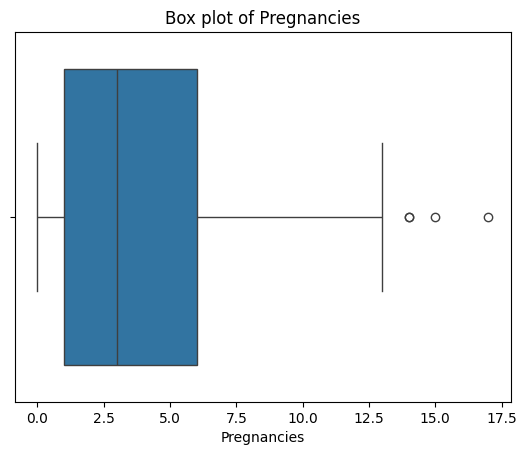

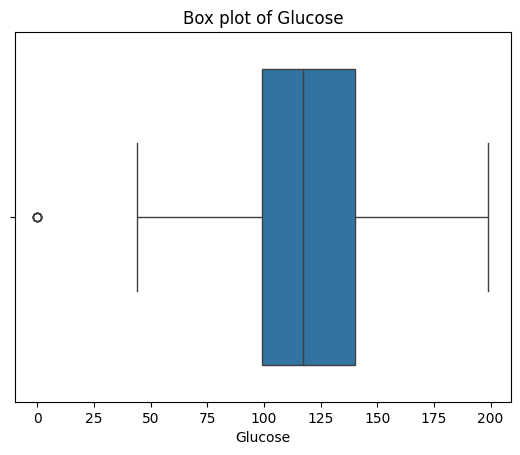

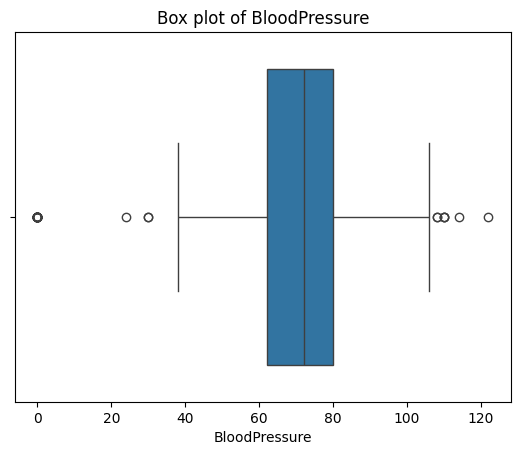

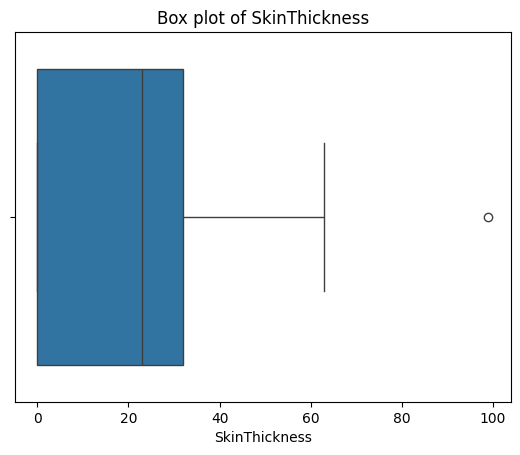

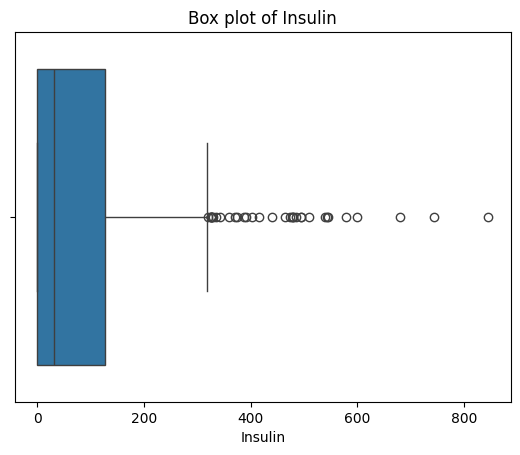

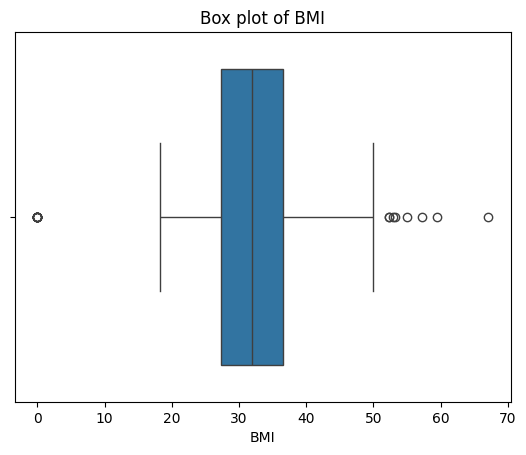

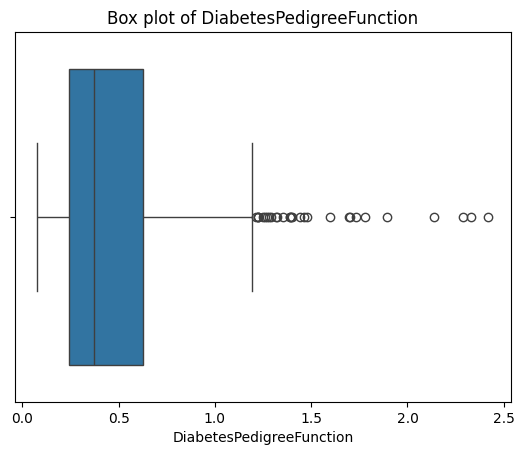

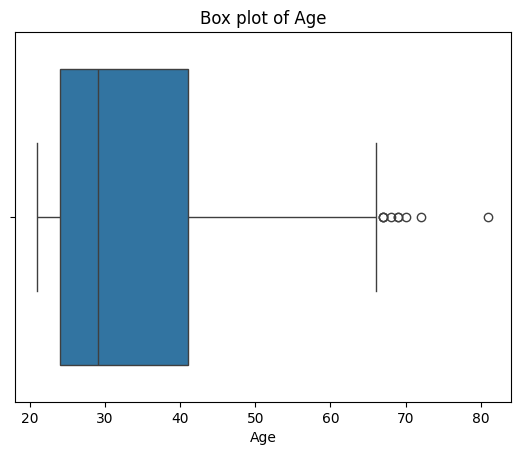

In [23]:
# Create visualizations such as histograms, box plots, or pair plots to visualize the distributions and relationships between features.
import matplotlib.pyplot as plt
import seaborn as sns
for i in df.columns.drop('Outcome'):
    plt.figure()
    sns.boxplot(x=df[i])
    plt.title(f'Box plot of {i}')

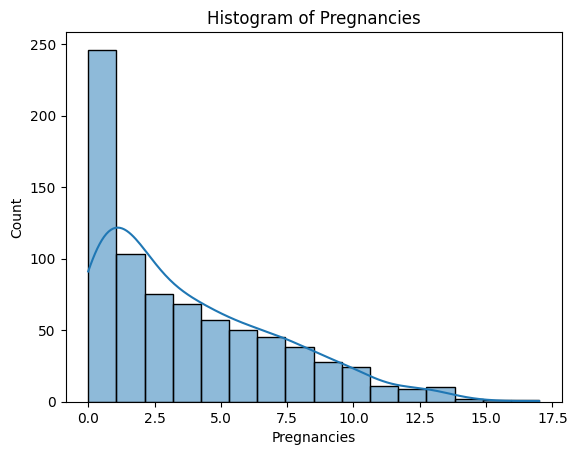

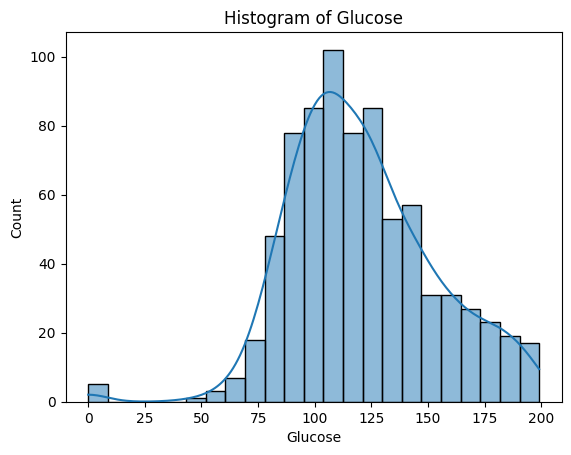

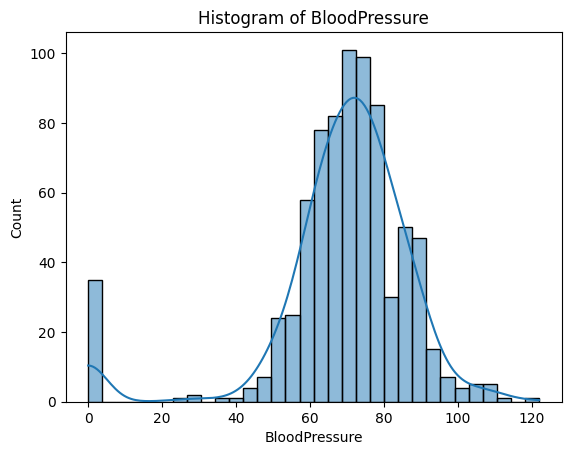

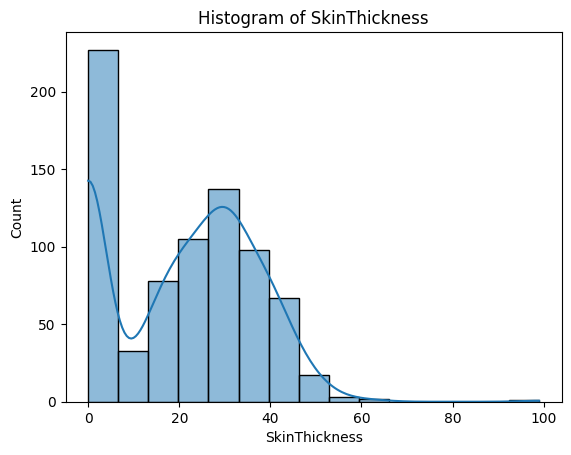

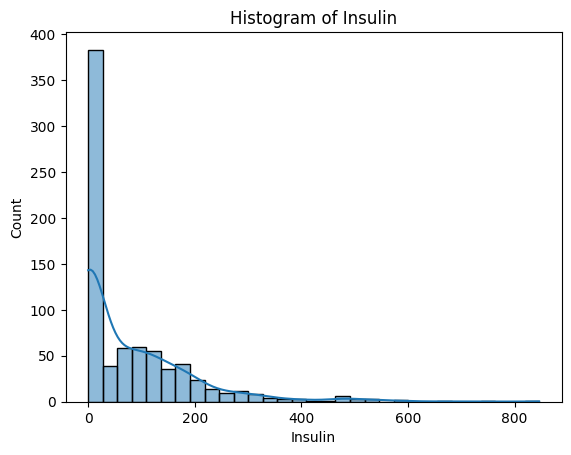

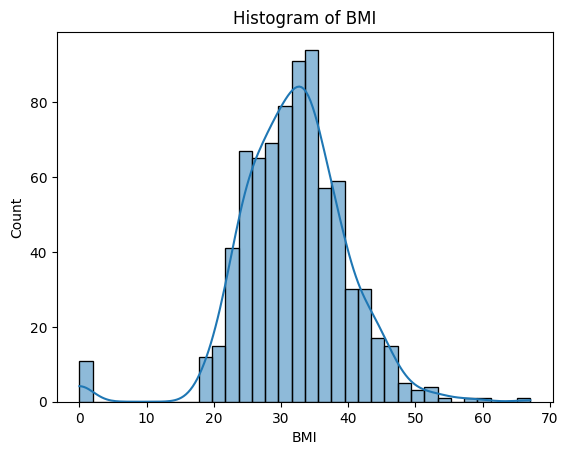

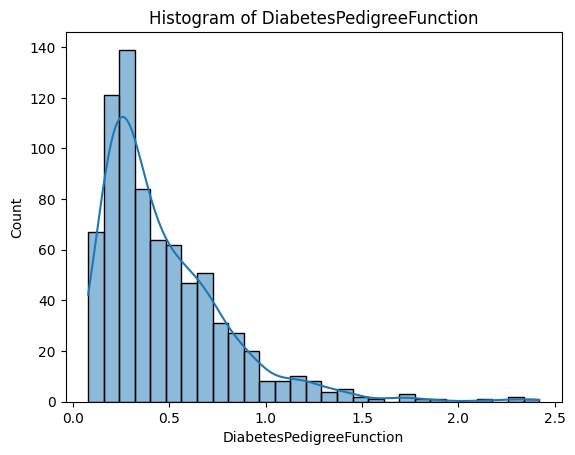

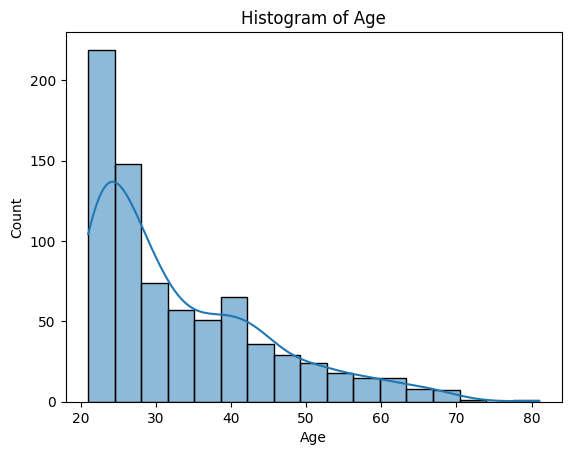

In [24]:
# histogram
for i in df.columns.drop('Outcome'):
    plt.figure()
    sns.histplot(df[i], kde=True)
    plt.title(f'Histogram of {i}')

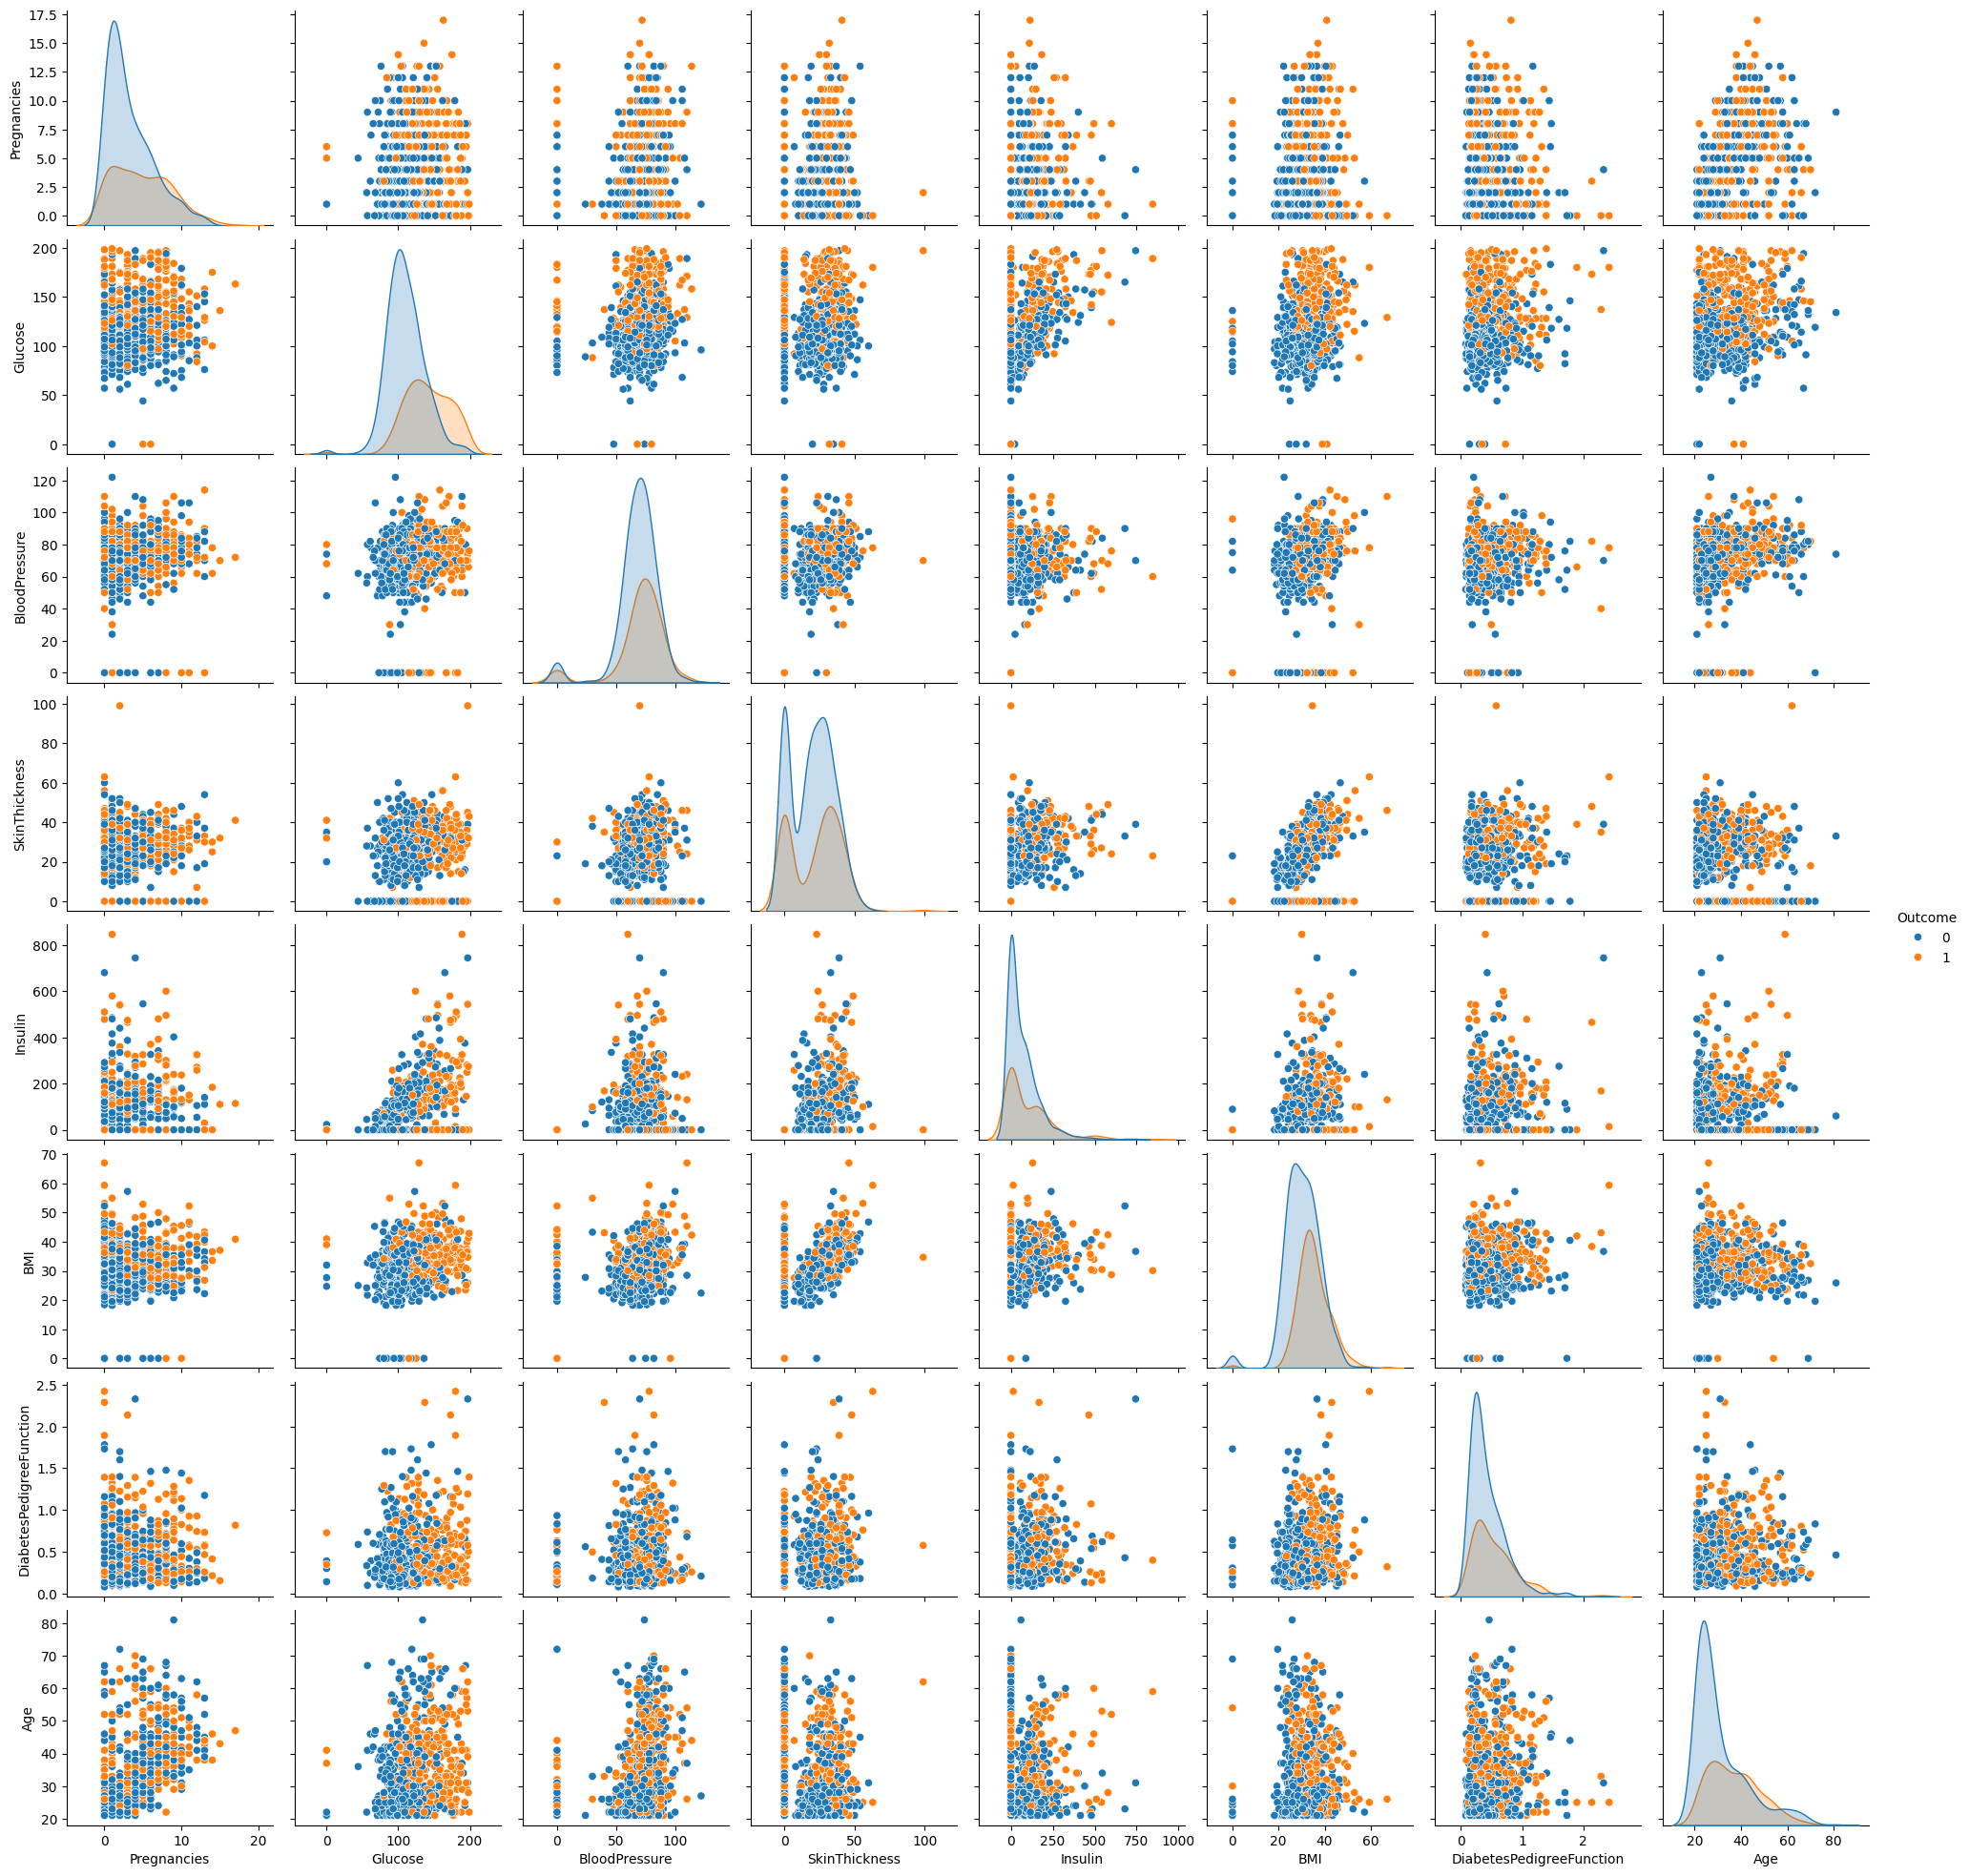

In [25]:
# pairplot
sns.pairplot(df, hue='Outcome')

In [26]:
# Handle missing values (e.g., imputation).
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [ ]:
# Encode categorical variables.
df.info()
# as all columns are numerical, no need to encode categorical variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [37]:
# Build a logistic regression model using appropriate libraries (e.g., scikit-learn).
# Train the model using the training data.
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['Outcome'])
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

[0]
Accuracy: 0.7597402597402597
Precision: 0.68
Recall: 0.6181818181818182
F1 Score: 0.6476190476190476
ROC-AUC Score: 0.8192837465564738


C:\Users\Dinesh\AppData\Roaming\Python\Python313\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


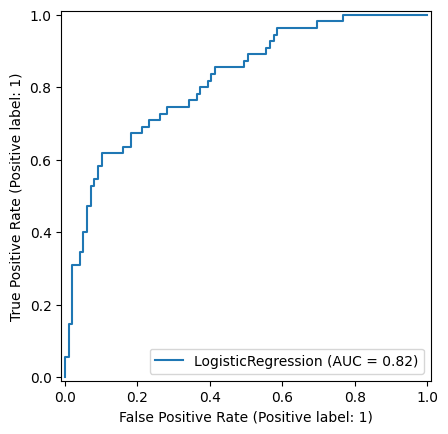

In [ ]:
# Evaluate the performance of the model on the testing data using accuracy, precision, recall, F1-score, and ROC-AUC score.
# Visualize the ROC curve.

from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, RocCurveDisplay

y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")

# Visualize the ROC curve.
RocCurveDisplay.from_estimator(model, X_test, y_test)

In [40]:
# Interpret the coefficients of the logistic regression model.
# Discuss the significance of features in predicting the target variable (survival probability in this case).
coefficients = model.coef_[0]
feature_importance = pd.Series(coefficients, index=X.columns).sort_values(ascending=False)
print("Feature Importance (Logistic Regression Coefficients):")
print(feature_importance)


Feature Importance (Logistic Regression Coefficients):
DiabetesPedigreeFunction    0.451828
Pregnancies                 0.068173
BMI                         0.063894
Glucose                     0.025663
Age                         0.024054
SkinThickness               0.001783
Insulin                    -0.000983
BloodPressure              -0.018339
dtype: float64
